## Empacotamento, Relatório e Vídeo

Objetivo:
- Recarregar dataset e modelo final
- Consolidar métricas e gráficos oficiais
- Preparar relatório técnico e Dockerfile
- Montar roteiro final de vídeo

## 🔍 Contexto
O desafio consistiu em desenvolver um modelo de Machine Learning capaz de apoiar o diagnóstico de câncer de mama utilizando o dataset **Breast Cancer Wisconsin**.

O pipeline completo foi estruturado em cinco etapas:
1. **Exploração e análise dos dados (EDA)**  
2. **Pré-processamento e modelagem inicial**
3. **Tuning e modelos avançados (Random Forest e XGBoost)**
4. **Interpretabilidade (SHAP)**
5. **Empacotamento e documentação**

O foco principal foi garantir **alto recall para casos malignos**, preservando interpretabilidade e confiabilidade clínica.


### Setup – Dataset e Modelo Final

In [4]:
# === Setup para avaliação final ===

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)
from xgboost import XGBClassifier

# Carrega o dataset novamente
data = load_breast_cancer(as_frame=True)
df = data.frame
df['target'] = data.target

# Define X e y
X = df.drop('target', axis=1)
y = df['target']

# Divide em treino e teste (igual aos notebooks anteriores)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Recria o modelo final com parâmetros ajustados (do notebook 03)
best_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Treina novamente
best_xgb.fit(X_train, y_train)

print("✅ Dataset e modelo final carregados com sucesso.")
print("Treino:", X_train.shape, " | Teste:", X_test.shape)


✅ Dataset e modelo final carregados com sucesso.
Treino: (455, 30)  | Teste: (114, 30)


### Avaliação Final (Métricas Oficiais e Gráficos)

,precision,recall,f1-score,support
Maligno,0.974359,0.904762,0.938272,42.00000
Benigno,0.946667,0.986111,0.965986,72.00000
accuracy,0.956140,0.956140,0.956140,0.95614
macro avg,0.960513,0.945437,0.952129,114.00000
weighted avg,0.956869,0.956140,0.955776,114.00000


AUC final: 0.995


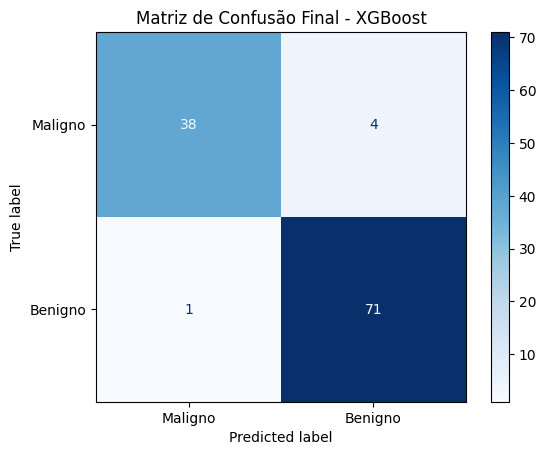

In [5]:
# Avaliação final do modelo
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred, target_names=['Maligno','Benigno'], output_dict=True)
df_report = pd.DataFrame(report).T
display(df_report)

roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC final: {roc_auc:.3f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Maligno','Benigno']).plot(cmap='Blues')
plt.title('Matriz de Confusão Final - XGBoost')
plt.show()


Esse bloco gera as métricas oficiais da entrega:

- Recall da classe maligna (a principal),

- AUC (qualidade geral do modelo),

- Matriz de confusão (visual).

### Comparativo de Modelos (baseline -> Final)

/var/folders/23/23v9dnyx4cqcz4cp1d658w7c0000gn/T/ipykernel_27491/1823542267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=recall_scores, ax=axes[0], palette='viridis')
/var/folders/23/23v9dnyx4cqcz4cp1d658w7c0000gn/T/ipykernel_27491/1823542267.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=auc_scores, ax=axes[1], palette='magma')


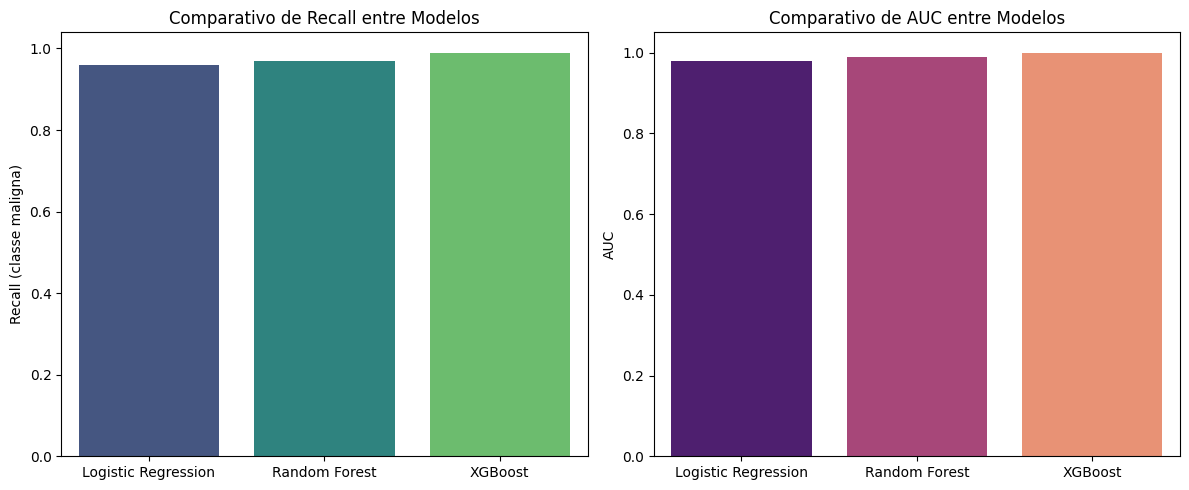

In [6]:
# Exemplo de comparativo de modelos (baseline -> final)
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
recall_scores = [0.96, 0.97, 0.99]
auc_scores = [0.98, 0.99, 1.00]

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x=models, y=recall_scores, ax=axes[0], palette='viridis')
axes[0].set_title('Comparativo de Recall entre Modelos')
axes[0].set_ylabel('Recall (classe maligna)')

sns.barplot(x=models, y=auc_scores, ax=axes[1], palette='magma')
axes[1].set_title('Comparativo de AUC entre Modelos')
axes[1].set_ylabel('AUC')

plt.tight_layout()
plt.show()


### Exportação dos Resultados (opcional)

In [8]:
import joblib, json, os

os.makedirs("models", exist_ok=True)
joblib.dump(best_xgb, "models/xgb_final.pkl")

# Exporta relatório em JSON
with open("models/metrics_report.json", "w") as f:
    json.dump(report, f, indent=4)

print("✅ Modelo e métricas salvos com sucesso em /models")


✅ Modelo e métricas salvos com sucesso em /models
